In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from common import OutlierRemover, plot_decomposed_features_3d, plot_features_3d
from datassist import explore, graph

In [2]:
rng = np.random.RandomState(42)

# EDA

## Inital Exploration

In [3]:
df_wine = pd.read_csv('data/winequality-white (2).csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_wine.shape

(4898, 12)

In [5]:
explore.overview(df_wine)

,NULL Count,Unique Items,Type
fixed acidity,0,68,float64
volatile acidity,0,125,float64
citric acid,0,87,float64
residual sugar,0,310,float64
chlorides,0,160,float64
free sulfur dioxide,0,132,float64
total sulfur dioxide,0,251,float64
density,0,890,float64
pH,0,103,float64
sulphates,0,79,float64


In [6]:
explore.basic_stats(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,6.9,0.3,0.3,6.4,0.0,35.3,138.4,1.0,3.2,0.5,10.5,5.9
std,0.8,0.1,0.1,5.1,0.0,17.0,42.5,0.0,0.2,0.1,1.2,0.9
min,3.8,0.1,0.0,0.6,0.0,2.0,9.0,1.0,2.7,0.2,8.0,3.0
25%,6.3,0.2,0.3,1.7,0.0,23.0,108.0,1.0,3.1,0.4,9.5,5.0
50%,6.8,0.3,0.3,5.2,0.0,34.0,134.0,1.0,3.2,0.5,10.4,6.0
75%,7.3,0.3,0.4,9.9,0.0,46.0,167.0,1.0,3.3,0.6,11.4,6.0
max,14.2,1.1,1.7,65.8,0.3,289.0,440.0,1.0,3.8,1.1,14.2,9.0
median,6.8,0.3,0.3,5.2,0.0,34.0,134.0,1.0,3.2,0.5,10.4,6.0
mode,6.8,0.3,0.3,1.2,0.0,29.0,111.0,1.0,3.1,0.5,9.4,6.0


In [7]:
sorted(df_wine['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

From an initial examination, we have 7 unique labels for the data (3 to 9)

This begs the  question: should we use the same number of clusters as labels? Or should we use 10 clusters, since the labels seem to lie on an incomplete scale (either 0-9 or 1-10)?

Already we are biased by the knowledge of the labels...

## Feature Distributions

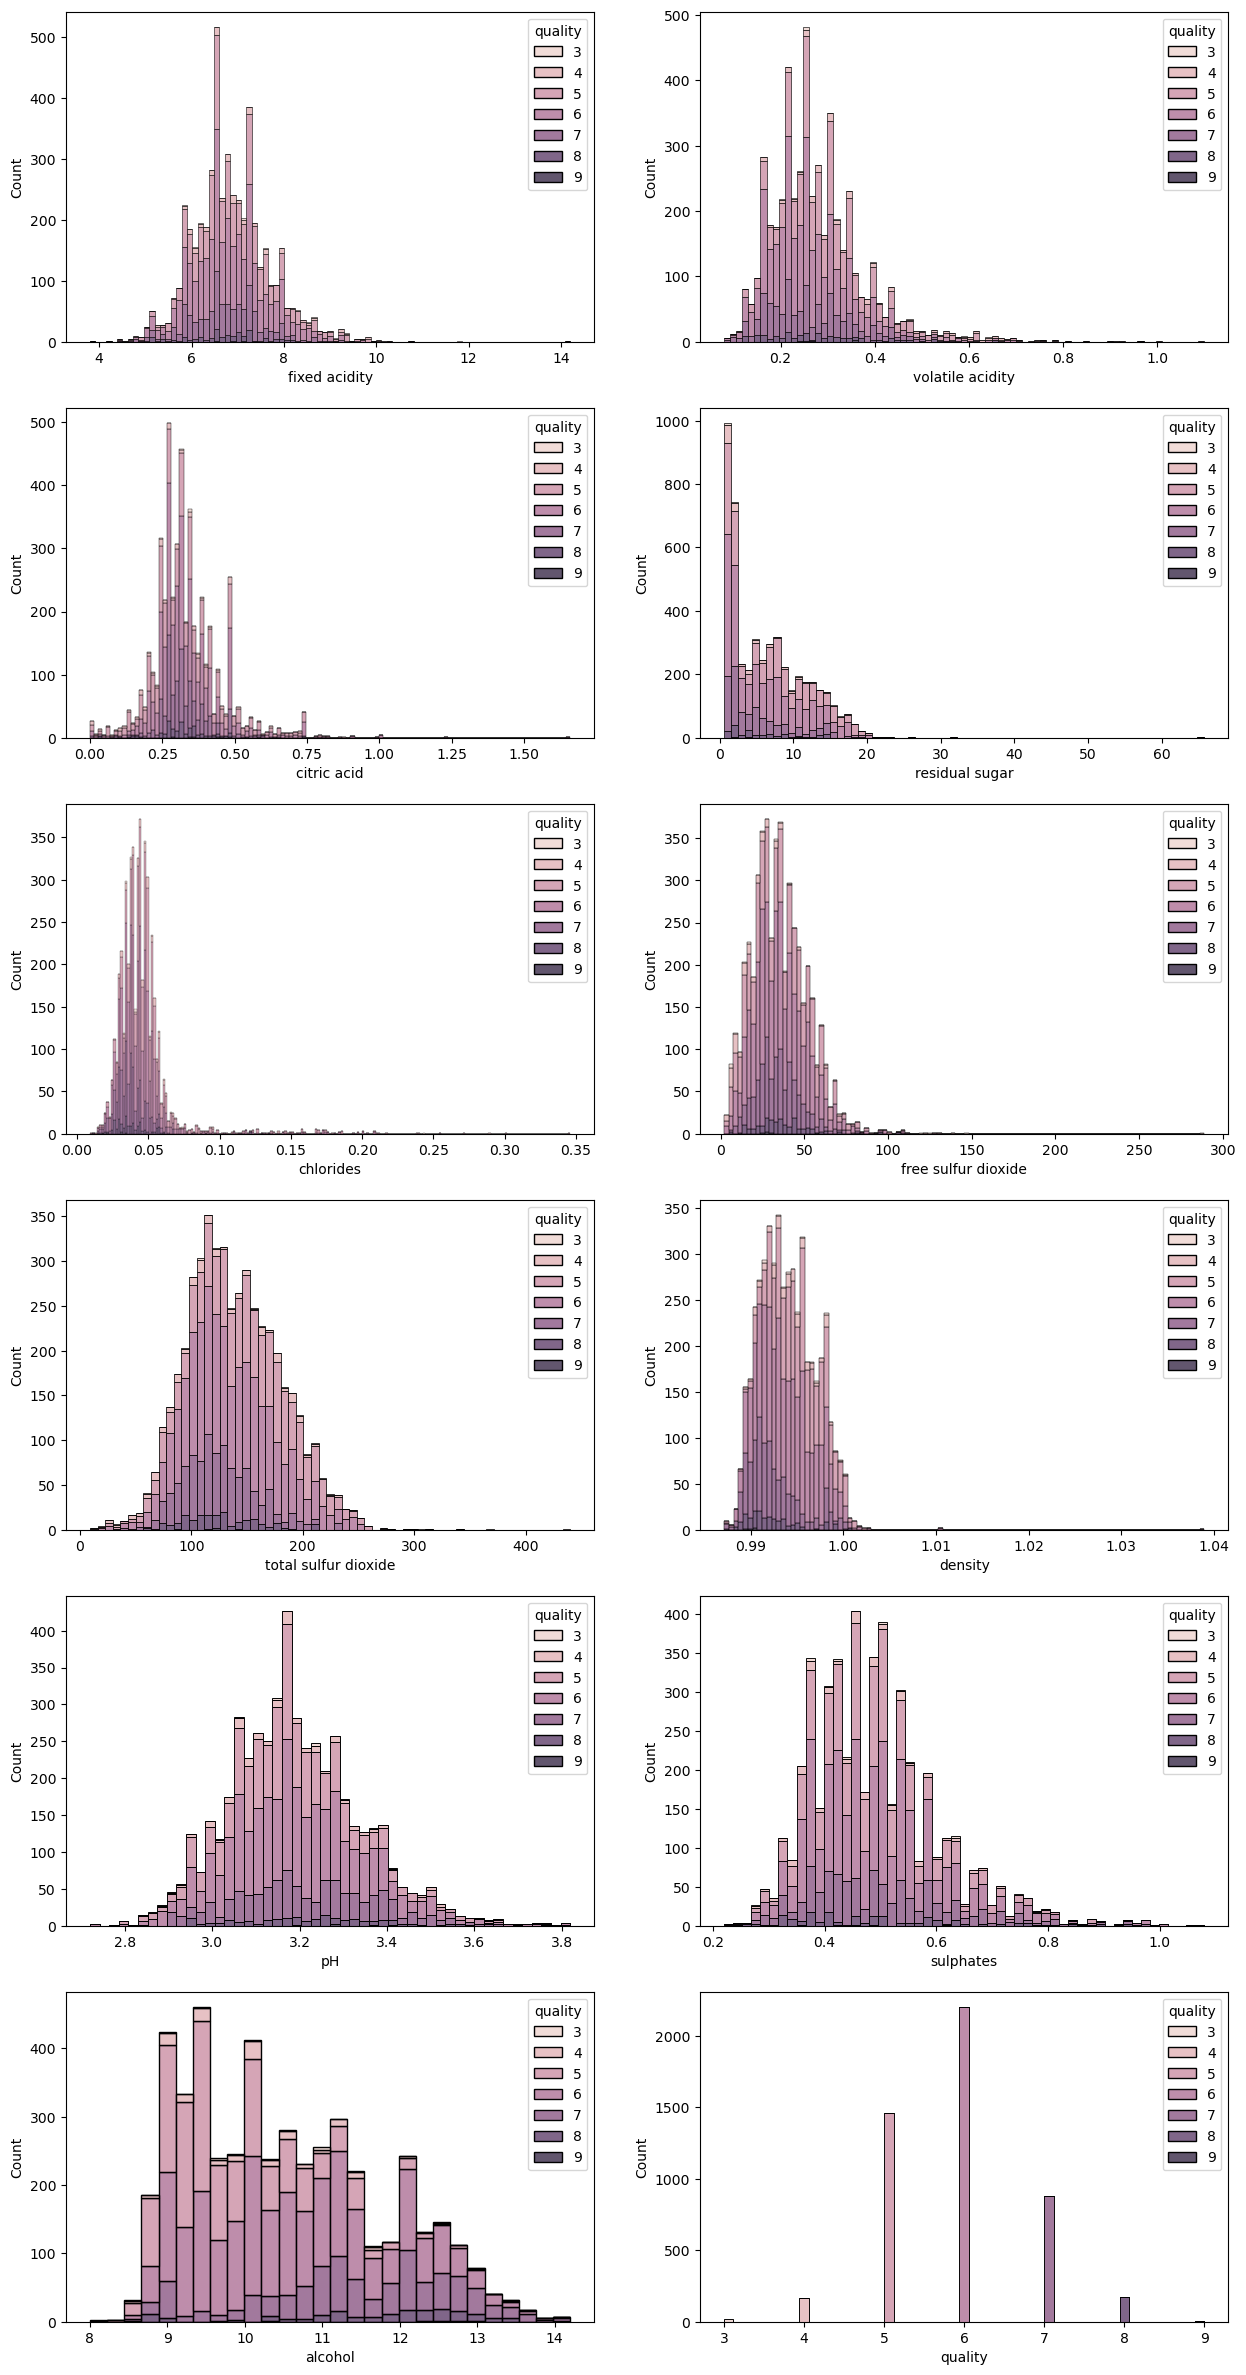

In [8]:
graph.plot_hist_of_numeric(df_wine, n_cols=2, category_col='quality')

Many of these plots seem to have reasonable distributions, but with long tails

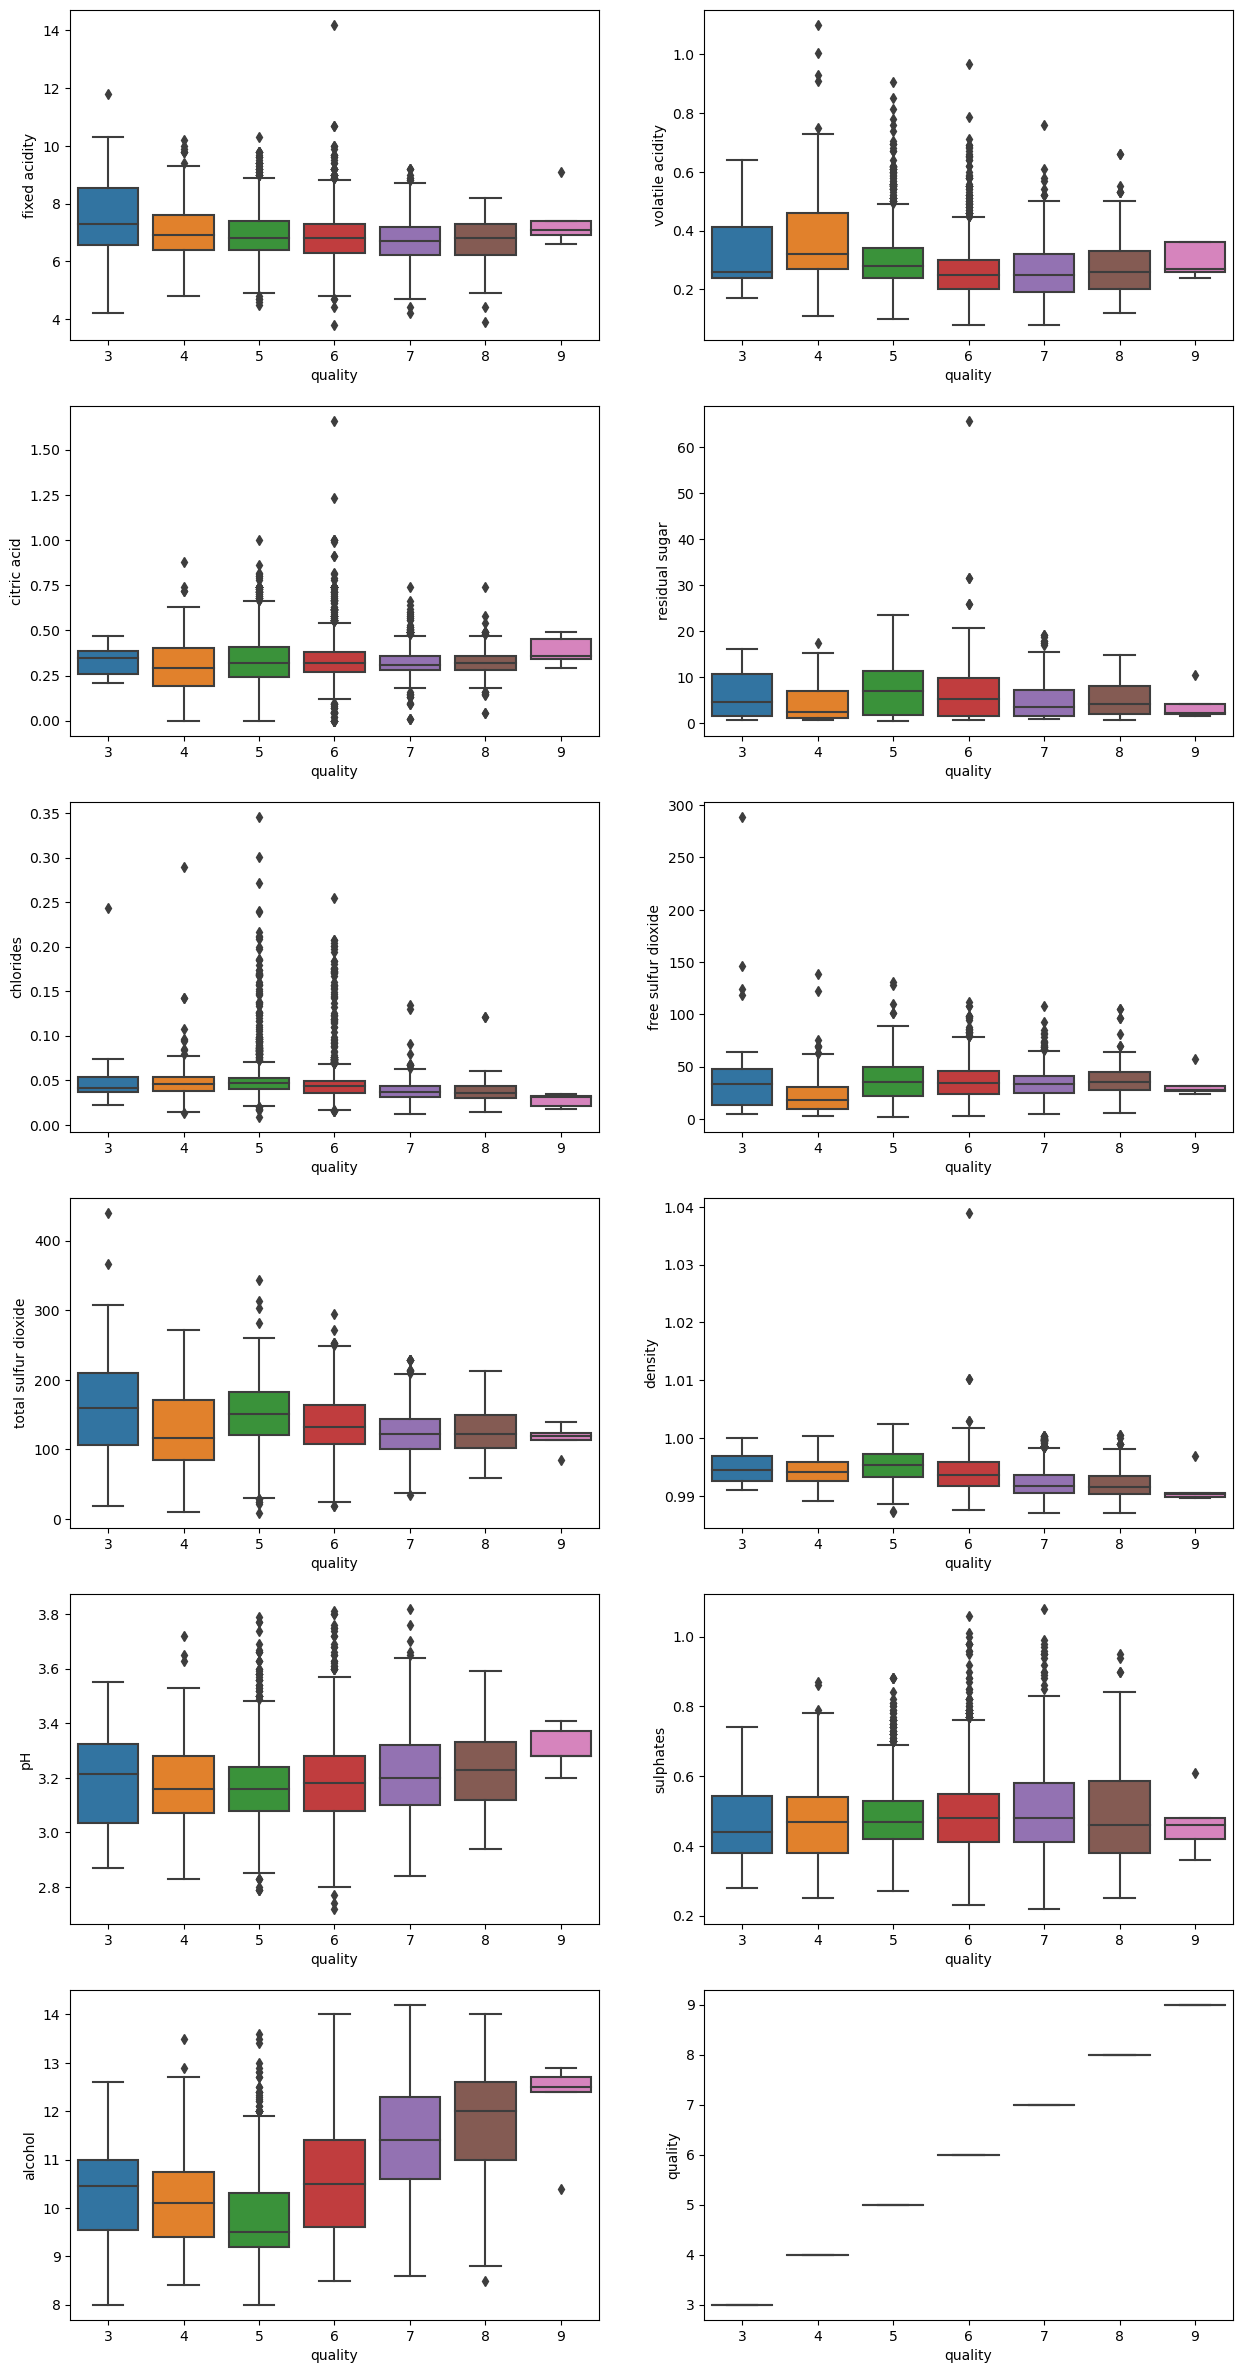

In [9]:
graph.plot_box_of_numeric(df_wine, n_cols=2, category_col='quality')

It seems to be quality ratings 5 and 6 that have the most extreme outliers in most features, the rest generally lie within similar ranges (except for the alcohol content feature)

In [10]:
df_outlier_count = explore.count_outliers(df_wine)
df_outlier_count

,index,Number of Outliers,% Outliers
4,chlorides,102,2.082483
2,citric acid,85,1.735402
1,volatile acidity,81,1.653736
9,sulphates,48,0.979992
0,fixed acidity,46,0.939159
5,free sulfur dioxide,32,0.653328
8,pH,32,0.653328
11,quality,25,0.510412
6,total sulfur dioxide,12,0.244998
3,residual sugar,9,0.183748


In [11]:
print(
    f'Maximum rows lost if outliers removed:'
    f' {df_outlier_count["Number of Outliers"].sum()},'
    f' {df_outlier_count["% Outliers"].sum():.2f} %'
)

Maximum rows lost if outliers removed: 475, 9.70 %


In [12]:
# Number of rows that contain outliers = 411
df_outliers = explore.find_outliers(df_wine)
df_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,8
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,8
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5
40,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4820,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4841,5.7,0.22,0.25,1.1,0.050,97.0,175.0,0.99099,3.44,0.62,11.10,6
4845,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.99336,3.18,0.60,9.50,5
4867,5.3,0.60,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.00,6


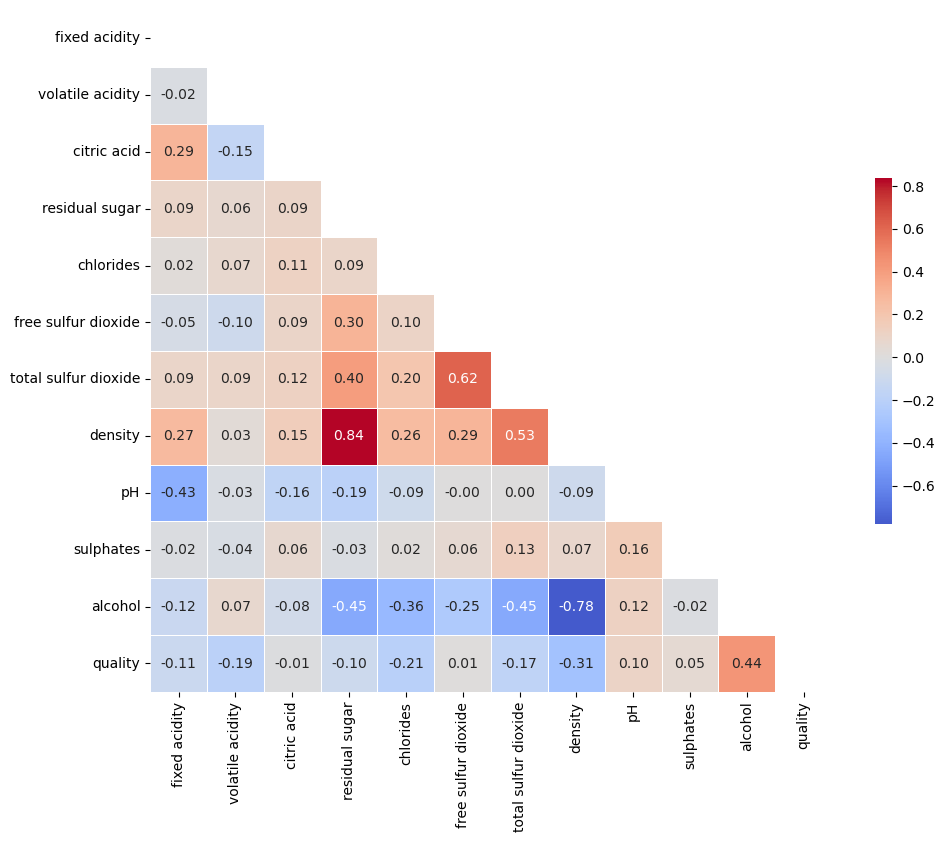

In [13]:
graph.plot_correlation_matrix(df_wine)

So it seems that alcohol, density then chlorides are the top three indicators of wine quality

## Plot the clusters

In [14]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [15]:
# PCA Pipeline
N_DIMS = 3

pipe_stages = [
    # ('outlier', OutlierRemover()),
    ('scaler', QuantileTransformer(output_distribution='normal')),
    ('pca', PCA(n_components=N_DIMS)),
]

pipe_pca = Pipeline(pipe_stages)

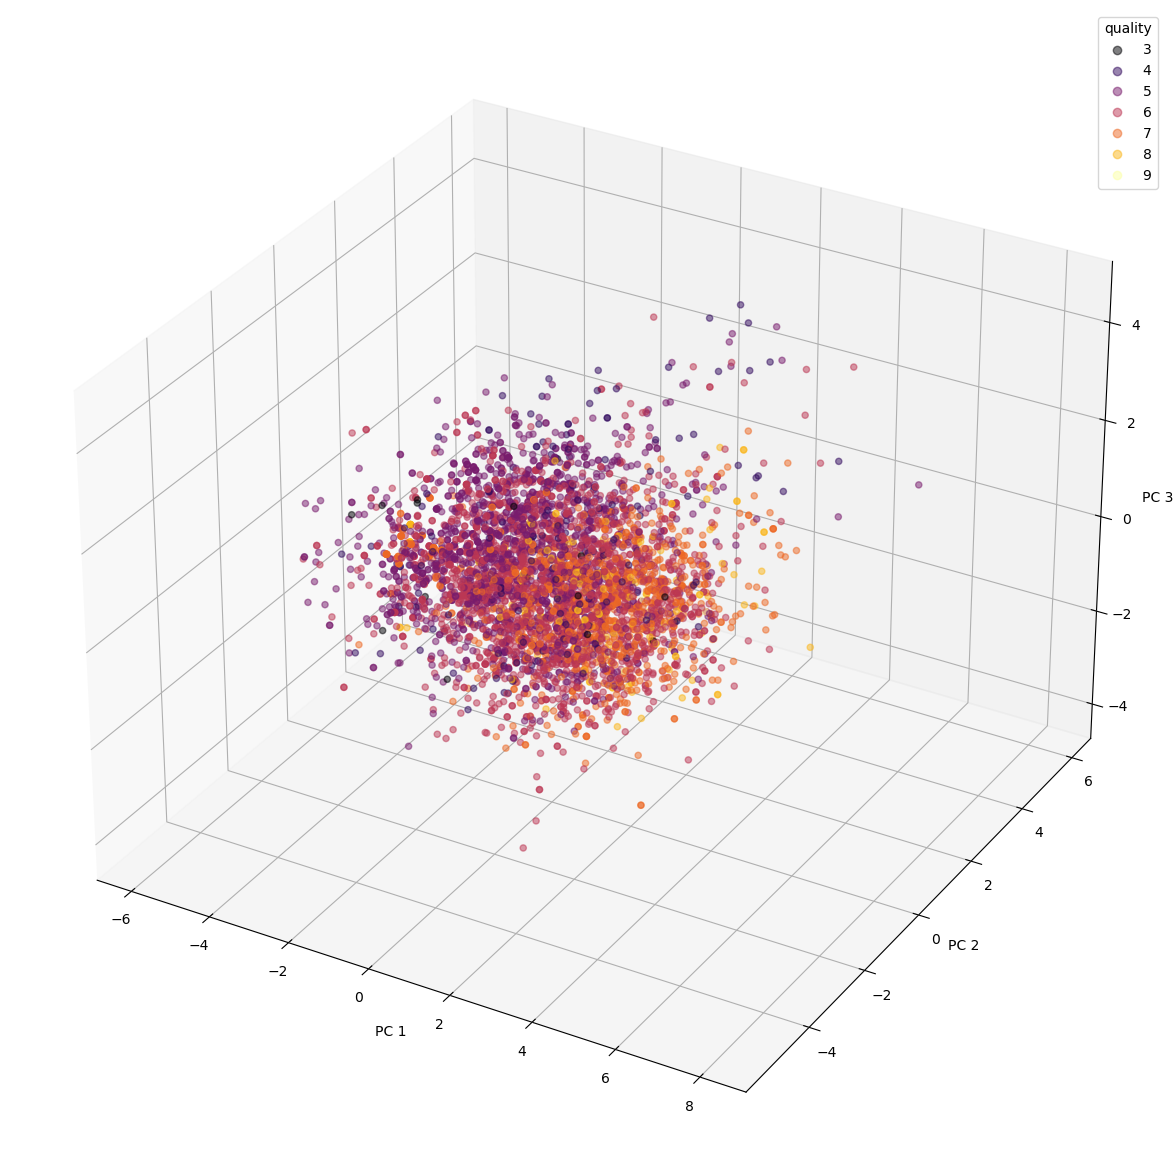

In [16]:
plot_decomposed_features_3d(
    pipe_pca.fit_transform(df_wine.drop(columns='quality')),
    df_wine['quality'],
    fig_labels='PC'
)

I was hoping to see more defined boundaries between wine quality ratings but this just looks like one big blob... :'(

- Although there is a trend that the wine quality rating seems to increase from left to right, the ratings are very close together so there may not be consistent or definitive clustering
- There are also a few outliers which belong to many labels (top-right of graph) so they may be clustered together

In [17]:
pipe_pca.named_steps['pca'].explained_variance_ratio_

array([0.30431313, 0.14697879, 0.11450728])

### Is T-SNE any better for visualising?

In [18]:
from sklearn.manifold import TSNE

In [19]:
# TSNE Pipeline

pipe_stages = [
    ('scaler', QuantileTransformer(output_distribution='normal')),
    ('tsne', TSNE(n_components=7, random_state=rng)),
]

pipe_tsne = Pipeline(pipe_stages)

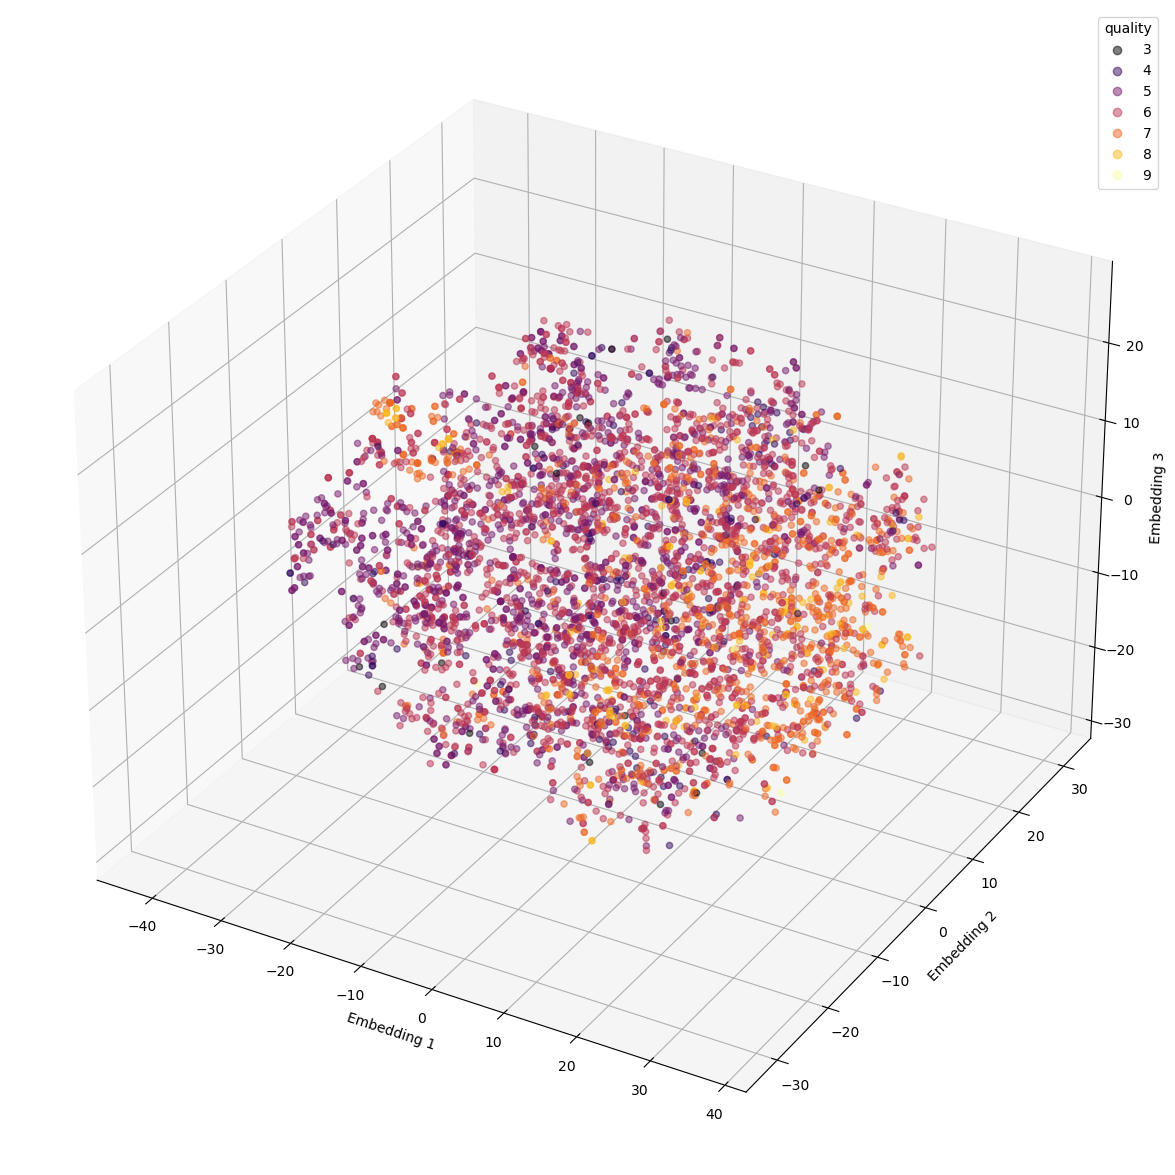

In [20]:
plot_decomposed_features_3d(
    pipe_tsne.fit_transform(df_wine.drop(columns='quality')),
    df_wine['quality'],
    fig_labels='Embedding'
)

This is also very blobby...

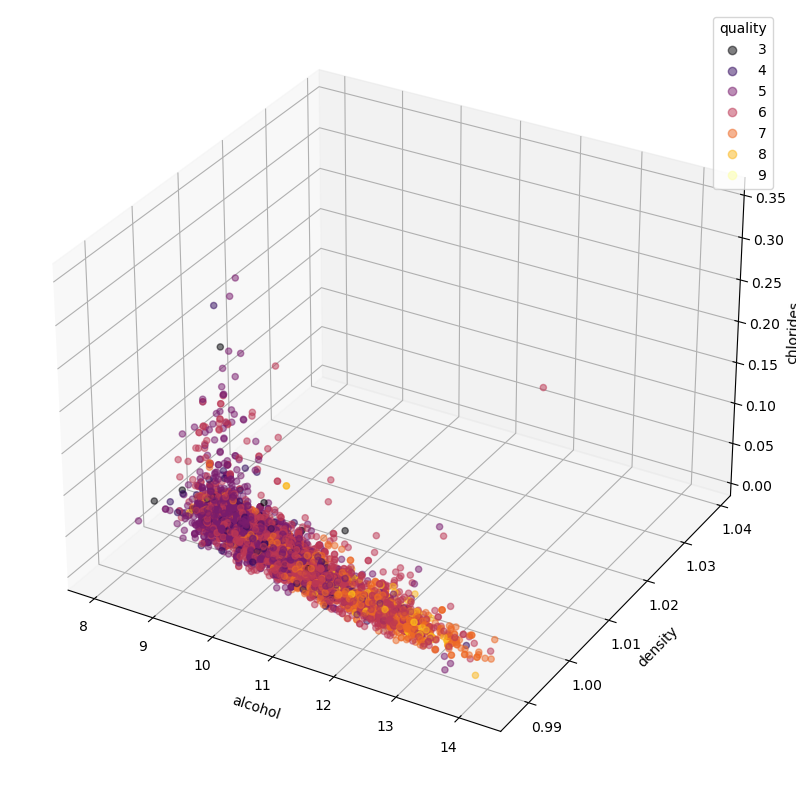

In [21]:
# plot the 3 most correlated features
plot_features_3d(df_wine, ['alcohol', 'density', 'chlorides'], 'quality')

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pipe_stages = [
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),
    ('scaler', QuantileTransformer(output_distribution='normal')),
    ('pca', PCA(n_components=N_DIMS)),
]

pipe_pca_poly = Pipeline(pipe_stages)

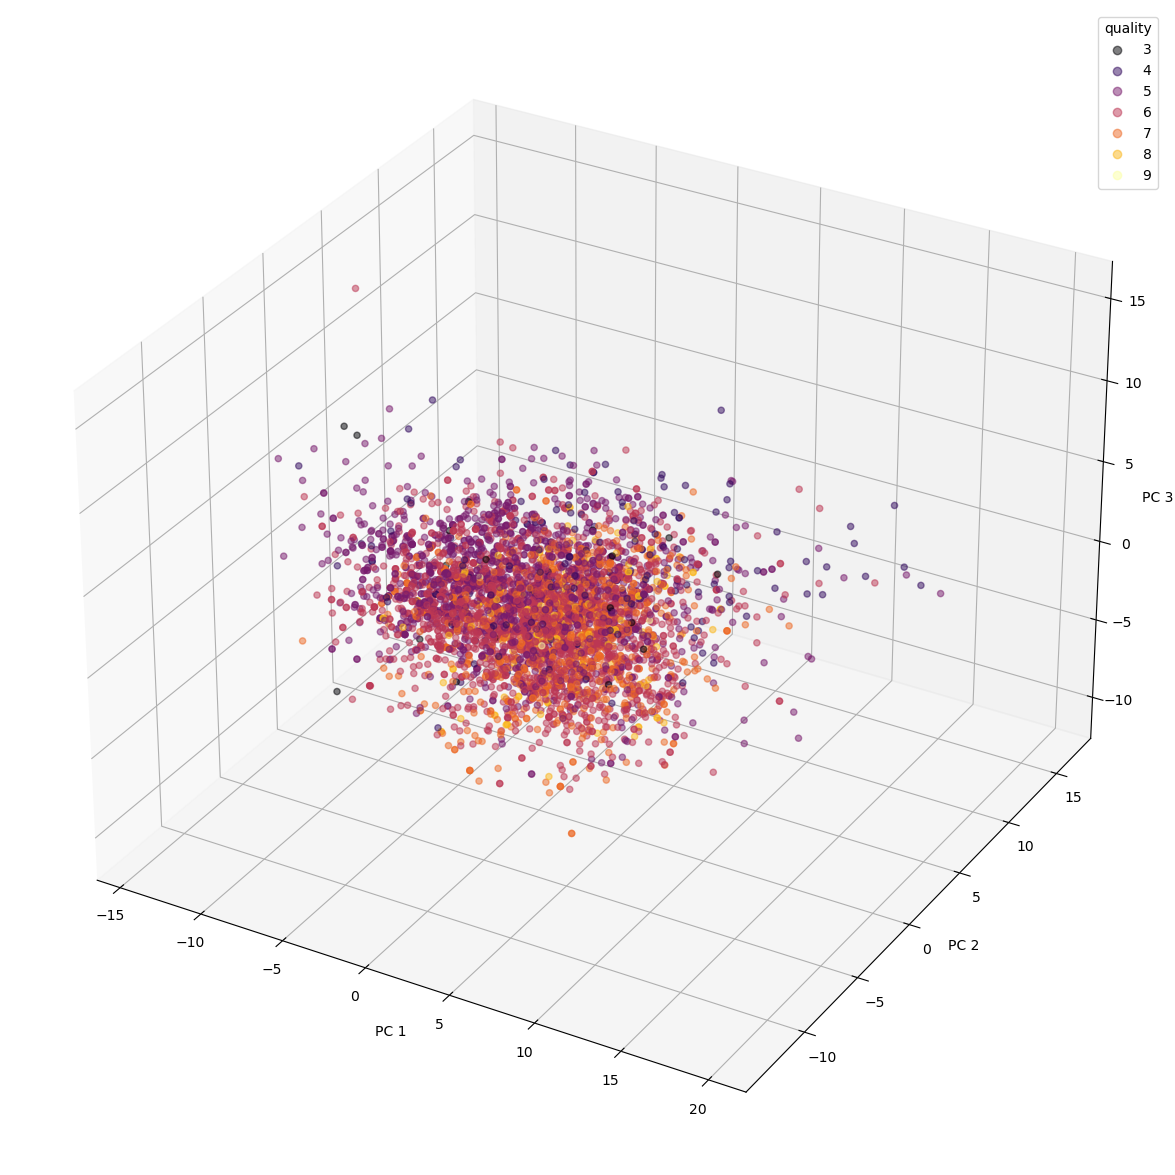

In [37]:
plot_decomposed_features_3d(
    pipe_pca_poly.fit_transform(df_wine.drop(columns='quality')),
    df_wine['quality'],
    fig_labels='PC',
)

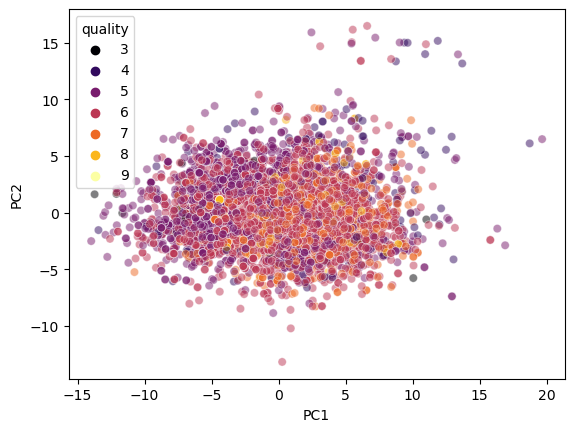

In [38]:
features = pipe_pca_poly.fit_transform(df_wine.drop(columns='quality'))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=df_wine['quality'], palette='inferno', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<Axes: xlabel='density', ylabel='residual sugar'>

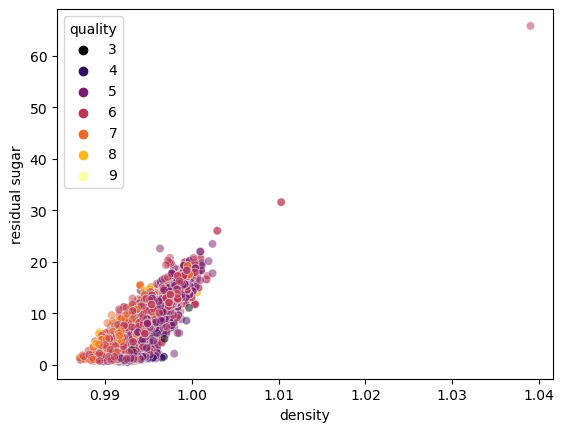

In [26]:
sns.scatterplot(df_wine, x='density', y='residual sugar', hue='quality', alpha=0.5, palette='inferno')

The big question is: *how to separate the features so there are more easily identifyable features?*